# Algoritmos de Clasificación
En este notebook veremos los algoritmos de clasificación como:
 + Regresión Logística
 + Árboles de Decisión

## Problemas de Clasificación

La variable dependiente puede ser binaria {0,1} o multiclase {0,1,2,...*k*}.

Ejemplos de calsificación binaria pueden ser si un correo es spam o no, o si una transacción es fraudulenta o no y de multiclase puede ser el reconocimiento de rostros.

Entonces si tuviésemos un *dataset* con la siguiente distribución se supone que podríamos separar de alguna manera para clasificarlos.

<img src="Imagenes/clasificacion_1.png" />

Por ejemplo con una regresión lineal, es decir, una recta.

<img src="Imagenes/clasificacion_2.jpg" />

Como observamos, hacerlo de esta manera nos clasificará mal algunos puntos y aquí es donde entra nuestra regresión salvadora: la *regresión logística*.

## Regresión Logística

Esta regresión regresa una probabilidad. Como saben, está entre 0 y 1 y se define de la siguiente manera:

$f(x) = \log p(x) \dfrac {1} {1-p(x)} = \beta_0 + x\beta$

Resolviendo la ecuación:

$\frac {1}{1+e^{-(\beta_0 + x\beta)}}$

Por ende al devolver una probabilidad el científico de datos, en este caso ustedes, indicará el *cut-off* para saber si es de una clase u otra.

Por ejemplo, si nos indica 0.7, entonces tendra un 70% de probabilidad que se clasifique como 1 dado los valores que le dieron.

Básicamente:

<img src="Imagenes/clasificacion_3.png" width="400" height="400" />

Esto te devuelve para cada registro una probabilidad:

\begin{equation}
  \hat{y} =
    \begin{cases}
      0 & \text{si $\hat{p}$ < 0.5 }\\
      1 & \text{si $\hat{p} \geq$ 0.5 }\\
    \end{cases}       
\end{equation}


¿Cómo se entrena la Regresión Logística?

El objetivo del entrenamiento es obtener los parámetros $\beta$ tal que estime altas probabilidades a instancias postivias ($y = 1$) y baja probabilidad a instancias negativas ($y = 0$)

Esto se logra con la funcion de costo apropiada, para cada registro, es de la siguiente manera:

\begin{equation}
  c(\theta) =
    \begin{cases}
      -log( \hat{p}) & \text{si y=1 }\\
      -log(1- \hat{p}) & \text{si y=0 }\\
    \end{cases}       
\end{equation}

La función de costo crece mucho si la ecuación de la regresión ($t$) tiende a 0, entonces la función de costo será mas grande, si el modelo estima una probabilidad cercana a 0 para instancias positivas, a su vez, será mas grande si el modelo estima probabilidades cercanas a 1 para instancias negativas.

Por otro lado, $-ln(t)$ tiende a 0 cuando $t$ se acerca a 1, entonces la función de costo tenderá a 0 si estima una probabilidad cercana a 0 para instancias negativas o cercano a 1 para instancias positivas.

La función de costo sobre todo el conjunto de registros es el promedio de los costos de todas las instancias del entrenamiento llamada *log-loss*:

$J(\theta) = \frac{1}{m} \sum{[y^{(i)}log(\hat{p^{(i)}) +(1-y^{(i)})}log(1-\hat{p^{(i)}})]}$

No existe una manera exacta para minimizar tal función como con mínimos cuadrados, sin embargo, al ser la función de costo una función convexa podemos aplicar el gradiente descendiente para encontrar el mínimo global de manera que:

$\frac{\partial}{\partial\theta_i} J(\theta) = \frac{1}{m} \sum{[\sigma(\theta^T . x^{(i)})-y^{(i)})]x_j^{(i)}}$

Para cada registro se calcula el error de la predicción y se multiplica por el j-ésimo valor de la variable x.

Esta regresión tiene algunas limitaciones:
 + los parámetros del modelo se calculan usando una estimación de máxima similitud, es decir, estas serán válidas cuando para cada combinación de variables independientes tenemos un numero suficientemente alto de observaciones. (Grados de libertad)
 + Por el punto anterior, NO debemos introducir variables inecesarias
 + La [colinealidad](http://www.hrc.es/bioest/Reglin_15.html) es un problema al igual que en la regresión lineal múltiple. Si los errores típicos en la estimación de los coeficientes son anormalmente grandes, es posible que esta situación se esté dando.

Por otro lado la función de costo tiene que cambiar (Investigar la función de costo para la logística) y su optimizacion sera por [Gradiente descendiente](https://ingsistemastelesup.files.wordpress.com/2017/03/gradiente-descendente.pdf).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)
# pip install scikit-plot
import scikitplot as skplt
import seaborn as sns
plt.style.use('ggplot')
font = {'family' : 'sans','weight' : 'bold','size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (16,8)

In [8]:
df = pd.read_csv('Datos/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
# metodo aburrido
wine = []
for i in df.quality:
    if i > 6:
       wine.append(1)
    else:
        wine.append(0)
        
df['good_wine'] = wine

In [11]:
#Variable objetivo
df['good_wine'] = np.where(df.quality > 6, 1, 0)
perc_gw = df.good_wine.mean() * 100
print('Porcentaje de buenos vinos','%1.2f %%'  % perc_gw)

Porcentaje de buenos vinos 21.64 %


# Analisis exploratorio descriptivo

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


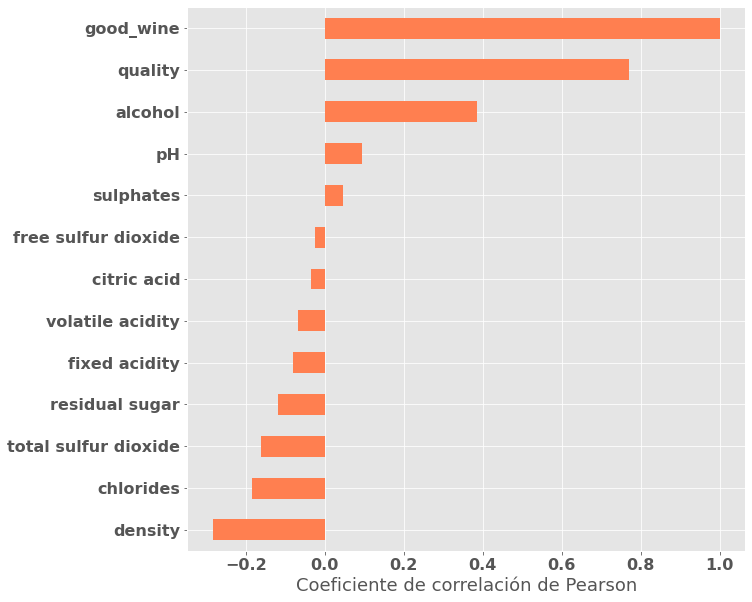

In [13]:
df.corrwith(
    df.good_wine).sort_values().plot.barh(
    figsize=(10,10), color='coral')
plt.xlabel('Coeficiente de correlación de Pearson');

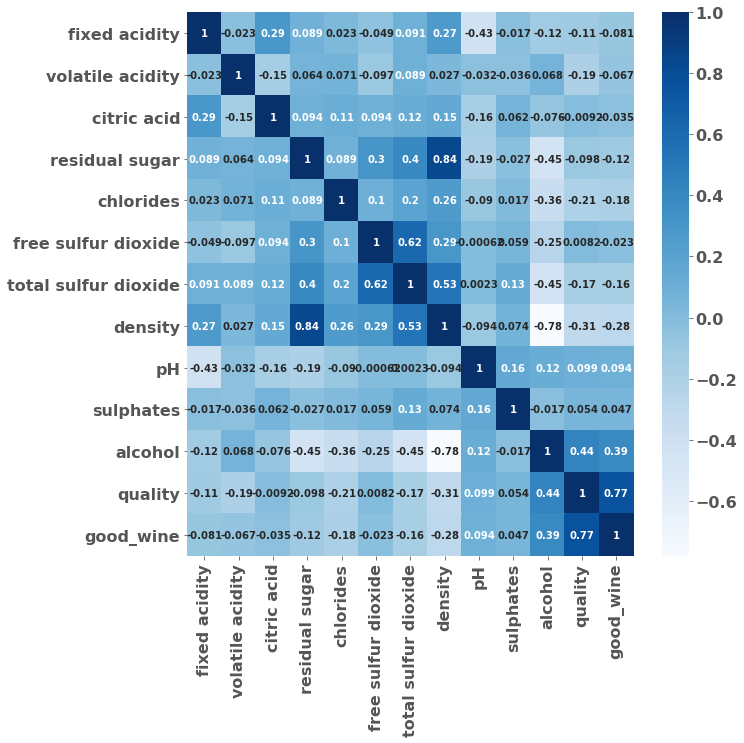

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True, annot_kws={'fontsize':10});

# Entrenamiento 

In [15]:
x_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [16]:
# estandarizado
x_std = (df[x_names] - df[x_names].mean()) / df[x_names].std()

x_train, x_test, y_train,y_test = train_test_split(
    x_std, df.good_wine, test_size=0.2, random_state=69)

In [17]:
# normales
x_train, x_test, y_train,y_test = train_test_split(
    df[x_names], df.good_wine, test_size=0.2, random_state=69)

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_hat = model.predict(x_test)
y_hat_proba = model.predict_proba(x_test)

In [20]:
y_hat[:5]

array([0, 0, 0, 0, 1])

In [21]:
y_hat_proba[:5]

array([[0.76345333, 0.23654667],
       [0.54532955, 0.45467045],
       [0.93507584, 0.06492416],
       [0.96126832, 0.03873168],
       [0.30056934, 0.69943066]])

<AxesSubplot:>

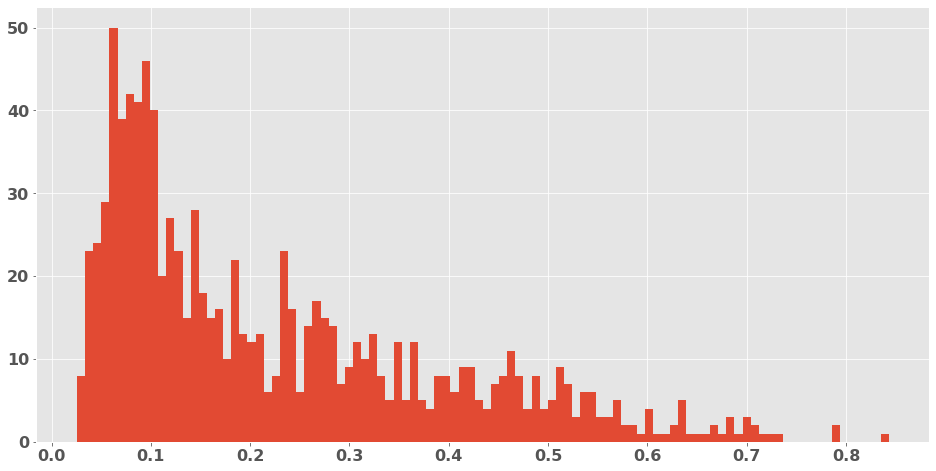

In [22]:
pd.DataFrame(y_hat_proba)[1].hist(bins=100)

# Evaluación del Modelo

Para evaluar un modelo es necesario tener una métrica adecuada según sea el tipo de problema al que nos enfrentamos.

 + [Precisión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score): es la habilidad de clasificar como no positvos a las muestras que en realidad son negativas 0
 + [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) (sensibilidad): es la habilidad del clasificador de encontrar todas las muestras positivas.
 + [F1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score): Es un promedio ponderado por la precisión y sensibilidad.
 + [matriz de confusion](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix): Mide la exactitud del modelo.
 + [Area bajo la curva ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
 
Para que quede mas claro la diferencia entre precisión y exactitud:
<img src="Imagenes/exactitud-y-precision.jpg">
 
A mayor precisión se explica mas la varianza de los datos y a mayor exactitud concuerdan mas el valor estimado con respecto al real.

In [23]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       770
           1       0.47      0.19      0.27       210

    accuracy                           0.78       980
   macro avg       0.64      0.57      0.57       980
weighted avg       0.74      0.78      0.74       980



Para interpretar la [matriz de confusión](http://calidadcliente.blogspot.com/2018/03/matriz-de-confusion.html) tenemos la siguiente ilustración:

<img src="Imagenes/mat_conf.jpg">

+ Verdaderos Positivos (VP): corresponden a aquellos eventos que realmente sucedieron y el sistema de predicción acertó.

+ Falsos Positivos (FP): son aquellos eventos que no sucedieron pero fueron clasificados como si hubiera sucedido.

+ Falsos Negativos (FN): son aquellos eventos que sí sucedieron pero que el sistema no los detectó.

+ Verdaderos Negativos (VN): aquellos eventos que no sucedieron y que el sistema los clasificó correctamente como tal.


mean_squared_error,mean_absolute_error,
r2_score,explained_variance_score, roc_auc_score,
classification_report, confusion_matrix,
roc_curve, accuracy_score

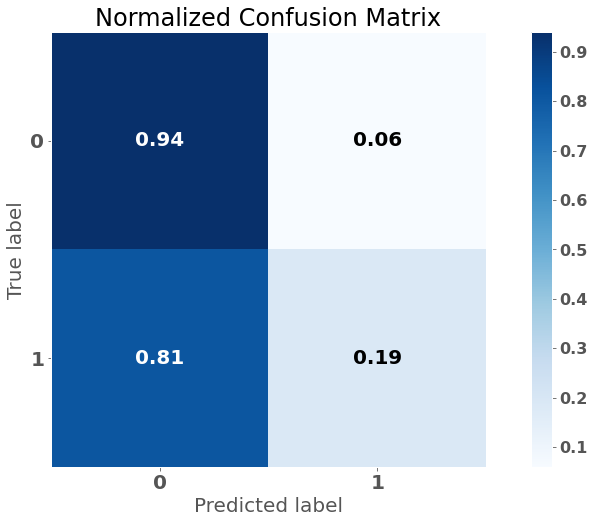

In [24]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_hat, normalize=True);

In [25]:
# skplt.metrics.plot_roc_curve(y_test, y_hat_proba)
# Existen dos promedios,[micro o macro](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin/16001), para explicar.

In [26]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(
    y_test,y_hat))

Área bajo la curva ROC:  0.565


# Mejoramiento del modelo

Existen diversas alternativas para mejorar el modelo. Una es utilizando otro modelo que explique mas la varianza de los datos y que agarre efectos no lineales, otra manera sería limpiar de variables colineales que ensucien la predicción de nuestro modelo y la otra es balancear los datos para evitar el sobreajuste de los datos sobre una clase.

## Balanceo de clases
Un *dataset* desbalanceado se da cuando nuestra variable objetivo representa una pequeña fracción de todo el *dataset*, existen diversos métodos para atacar este problema como:
 
 + OverSample:
 <img src="Imagenes/oversample.png">
 
 + UnderSample:
 <img src="Imagenes/undersample.png">
 
 + [SMOTE](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#) (interesante saber este metodo)

In [27]:
y_train.value_counts()

0    3068
1     850
Name: good_wine, dtype: int64

In [28]:
# Class count
count_class_0, count_class_1 = y_train.value_counts()

# Majority class
x_data_majority = x_train.loc[y_train == 0]
y_data_majority = y_train.loc[y_train == 0]

# Minority class
x_data_minority = x_train.loc[y_train == 1]
y_data_minority = y_train.loc[y_train == 1]

###########################################

y_df_major_downsampled = y_data_majority.sample(n = count_class_1, random_state=69)
x_df_major_downsampled = x_data_majority.loc[y_df_major_downsampled.index]

y_data_downsampled = pd.concat([y_df_major_downsampled, y_data_minority])
x_data_downsampled = pd.concat([x_df_major_downsampled, x_data_minority])

y_data_downsampled.value_counts()

0    850
1    850
Name: good_wine, dtype: int64

In [29]:
model_under = LogisticRegression()
model_under.fit(x_data_downsampled, y_data_downsampled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_hat_under = model_under.predict(x_test)
y_hat_under_proba = model_under.predict_proba(x_test)

In [31]:
print(classification_report(y_test,y_hat_under))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       770
           1       0.39      0.70      0.50       210

    accuracy                           0.70       980
   macro avg       0.64      0.70      0.64       980
weighted avg       0.79      0.70      0.73       980



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

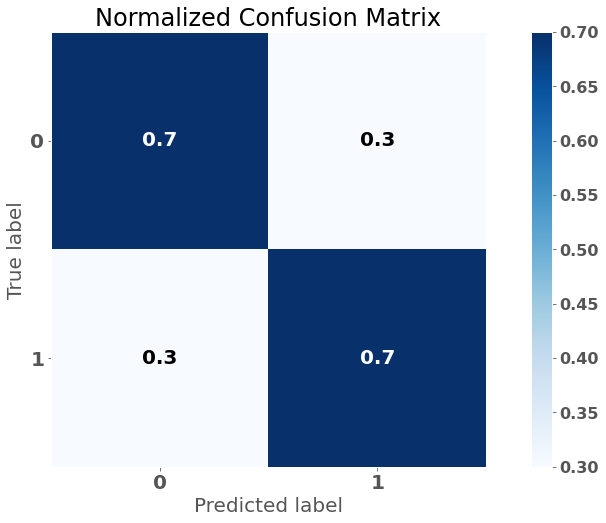

In [32]:
skplt.metrics.plot_confusion_matrix(y_test,y_hat_under, normalize=True)

In [33]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat_under))

Área bajo la curva ROC:  0.702


# Interpretación de Coeficientes

<AxesSubplot:>

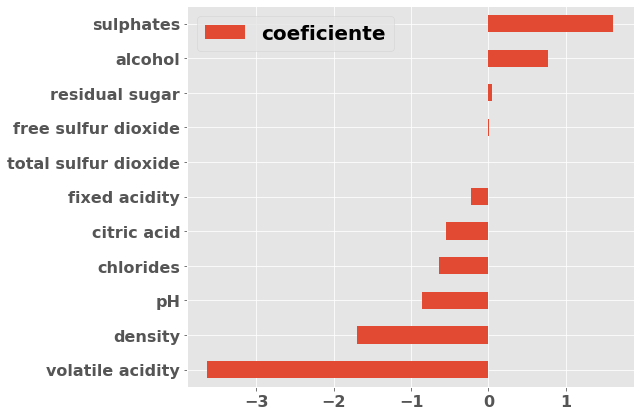

In [34]:
coef = model_under.coef_
coefs = pd.DataFrame(index = x_data_minority.columns, data =coef.T,
                     columns=['coeficiente'])
coefs.sort_values('coeficiente').plot.barh(figsize=(8,7))